        Date     PX_LAST
0 2015-12-31 2043.940000
1 2016-01-04 2012.660000
2 2016-01-05 2016.710000
3 2016-01-06 1990.260000
4 2016-01-07 1943.090000
(2515, 2)
Index(['Date', 'PX_LAST'], dtype='object')


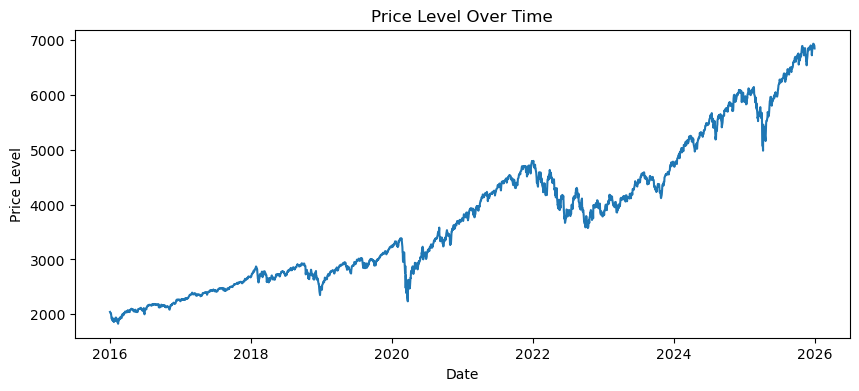

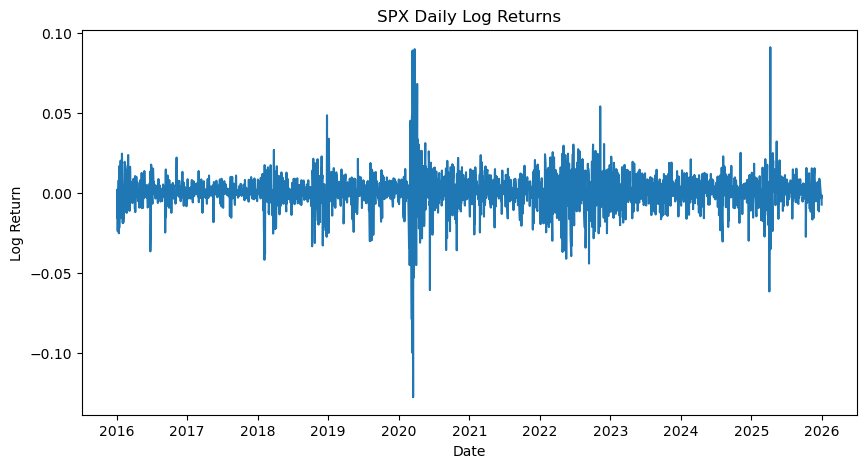

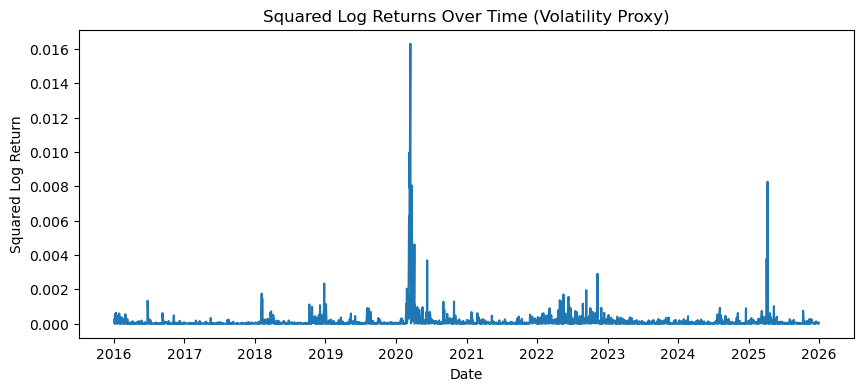

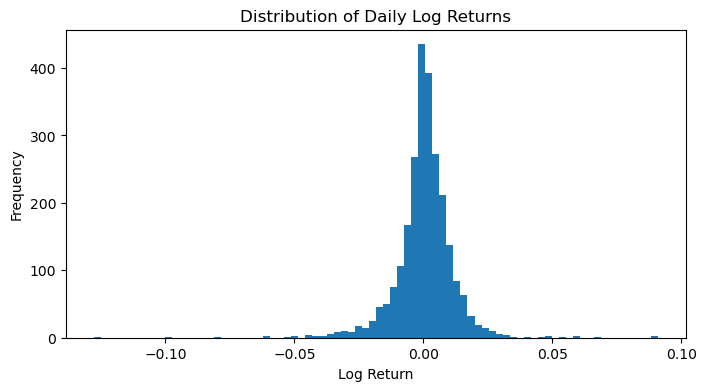

ADF Statistic: -16.07034817866798
p-value: 5.515575497965735e-29


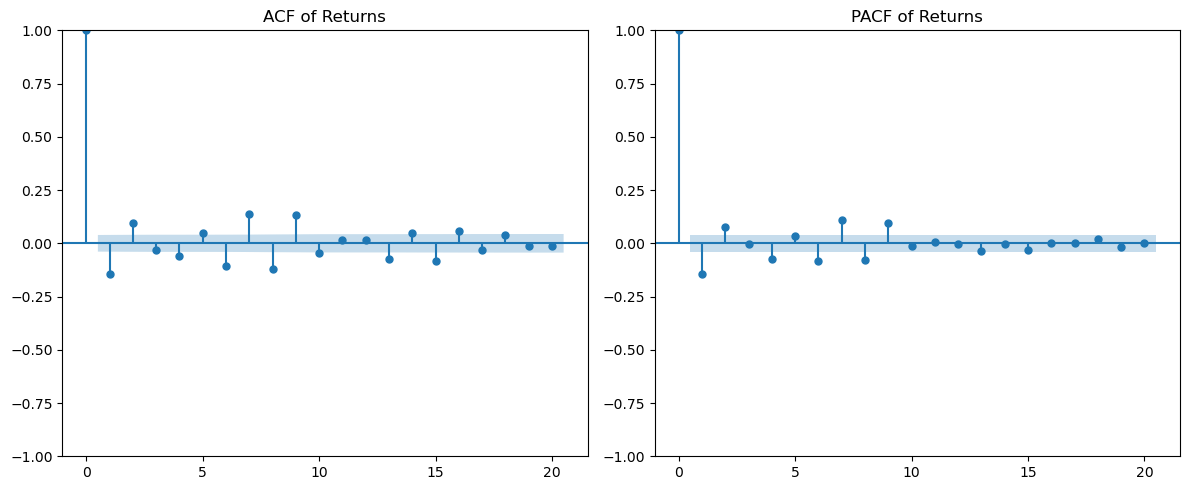

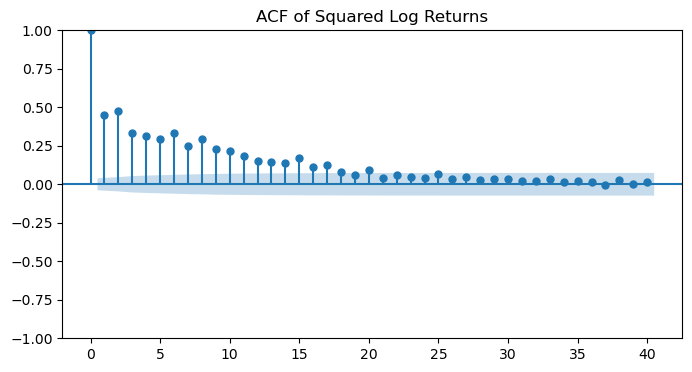

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

AR(1): BIC = -15369.99
MA(1): BIC = -15361.94
ARMA(1,1): BIC = -15368.61
ARMA(2,2): BIC = -15361.98
AR(9): BIC = -15427.63
MA(9): BIC = -15405.74
ARMA(9,9): BIC = -15366.33
Best model based on BIC: AR(9)

Ljung–Box Test (Residual Autocorrelation)
    Model  Lag    LB stat  p-value
ARMA(9,9)   10   0.143932 1.000000
ARMA(9,9)   20   2.223859 1.000000
    AR(9)   10   0.707075 0.999966
    AR(9)   20   6.460437 0.998115
    MA(9)   10   3.545635 0.965526
ARMA(9,9)   30  19.486930 0.929219
    AR(9)   30  28.789274 0.528686
    MA(9)   20  28.601460 0.095908
    MA(9)   30  50.595873 0.010745
ARMA(2,2)   10  96.434612 0.000000
ARMA(2,2)   20 125.693182 0.000000
ARMA(2,2)   30 153.656349 0.000000
ARMA(1,1)   10 108.015310 0.000000
ARMA(1,1)   20 139.524653 0.000000
ARMA(1,1)   30 167.476551 0.000000
    AR(1)   10 128.889117 0.000000
    AR(1)   20 163.282557 0.000000
    AR(1)   30 191.107410 0.000000
    MA(1)   10 145.639713 0.000000
    MA(1)   20 182.739960 0.000000
    MA(1)   30 210

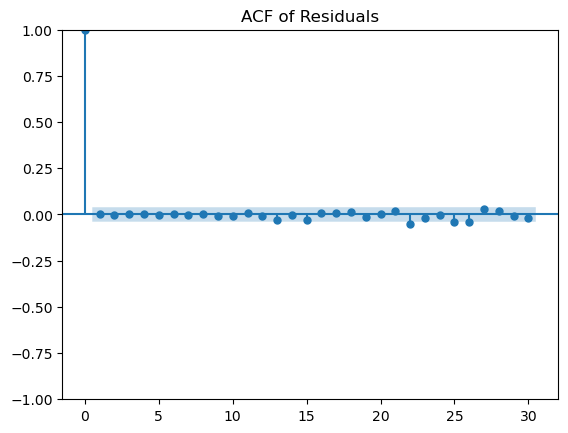

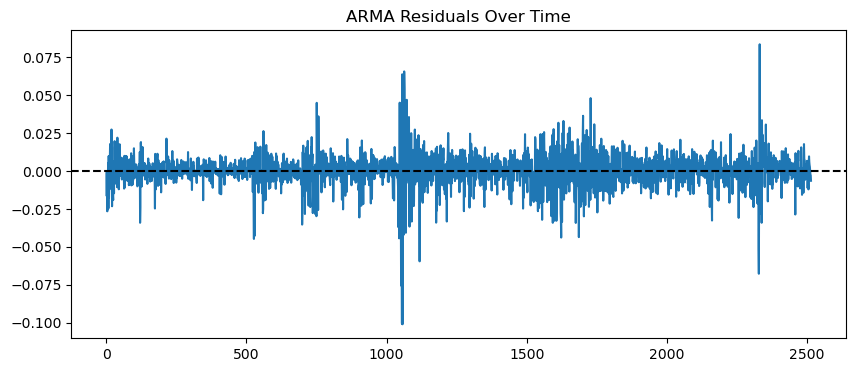

In [24]:
import pandas as pd
pd.set_option("display.float_format", "{:.6f}".format)
## Load the data from the Excel file##
file_path = "/Users/oliviadittrich/Desktop/Spring 2026/FIM 601/Project/Data/10yrs_Data.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")

## Explore the data ##
print(df.head())
print(df.shape)
print(df.columns)
df.columns

## Plot the price level (PX_LAST) over time ##
import matplotlib.pyplot as plt

x = df.index if isinstance(df.index, pd.DatetimeIndex) else df["Date"]

plt.figure(figsize=(10,4))
plt.plot(x, df["PX_LAST"])
plt.title("Price Level Over Time")
plt.xlabel("Date")
plt.ylabel("Price Level")
plt.show()

## Calculate log returns ##
import numpy as np

df["log_return"] = np.log(df["PX_LAST"]) - np.log(df["PX_LAST"].shift(1))


## Remove the first row which will have NaN log return ##
df = df.dropna(subset=["log_return"])
df["log_return"].describe()

## Plot the log returns ##
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["log_return"])
plt.title("SPX Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

## Plot the squared log returns to visualize volatility over time #
df["log_return_sq"] = df["log_return"]**2
x = df.index if isinstance(df.index, pd.DatetimeIndex) else df["Date"]

plt.figure(figsize=(10,4))
plt.plot(x, df["log_return_sq"])
plt.title("Squared Log Returns Over Time (Volatility Proxy)")
plt.xlabel("Date")
plt.ylabel("Squared Log Return")
plt.show()

## Plot the histogram of log returns to visualize the distribution ##
plt.figure(figsize=(8,4))
plt.hist(df["log_return"], bins=80)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

## Perform the Augmented Dickey-Fuller test to check for stationarity ##
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["log_return"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

## Check for autocorrelation in the log returns using ACF and PACF plots ##
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(df["log_return"], lags=20, ax=plt.gca())
plt.title("ACF of Returns")

plt.subplot(1,2,2)
plot_pacf(df["log_return"], lags=20, ax=plt.gca())
plt.title("PACF of Returns")

plt.tight_layout()
plt.show()

## Check for autocorrelation in the squared log returns to detect volatility clustering ##
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,4))
plot_acf(df["log_return_sq"], lags=40, ax=plt.gca())
plt.title("ACF of Squared Log Returns")
plt.show()

## Fit ARIMA models to the log returns based on the ACF and PACF plots ##
import statsmodels.api as sm
# AR(1)
model_ar1 = sm.tsa.ARIMA(df["log_return"], order=(1,0,0)).fit()

# MA(1)
model_ma1 = sm.tsa.ARIMA(df["log_return"], order=(0,0,1)).fit()

# ARMA(1,1)
model_arma11 = sm.tsa.ARIMA(df["log_return"], order=(1,0,1)).fit()

# ARMA(2,2)
model_arma22 = sm.tsa.ARIMA(df["log_return"], order=(2,0,2)).fit()

# AR(9)
model_ar9 = sm.tsa.ARIMA(df["log_return"], order=(9,0,0)).fit()

# MA(9)
model_ma9 = sm.tsa.ARIMA(df["log_return"], order=(0,0,9)).fit()

# ARMA(9,9)
model_arma99 = sm.tsa.ARIMA(df["log_return"], order=(9,0,9)).fit()

## Compare the BIC values of the fitted models to select the best one ##
bic_table = {
    "AR(1)": model_ar1.bic,
    "MA(1)": model_ma1.bic,
    "ARMA(1,1)": model_arma11.bic,
    "ARMA(2,2)": model_arma22.bic,
    "AR(9)": model_ar9.bic,
    "MA(9)": model_ma9.bic,
    "ARMA(9,9)": model_arma99.bic,
}
## Print the BIC values for each model ##
for k, v in bic_table.items():
    print(f"{k}: BIC = {v:.2f}")
## Identify the model with the lowest BIC value as the best model ##
    best_model_name = min(bic_table, key=bic_table.get)
print("Best model based on BIC:", best_model_name)

## Perform the Ljung–Box test ##
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

# Collect all fitted models
models = {
    "AR(1)": model_ar1,
    "MA(1)": model_ma1,
    "ARMA(1,1)": model_arma11,
    "ARMA(2,2)": model_arma22,
    "AR(9)": model_ar9,
    "MA(9)": model_ma9,
    "ARMA(9,9)": model_arma99
}

# Choose lag(s) — 20 is standard for daily financial data
lags = [10, 20, 30]

results = []

for name, model in models.items():
    resid = model.resid.dropna()
    
    lb = acorr_ljungbox(resid, lags=lags, return_df=True)
    
    results.append({
        "Model": name,
        "Lag": 10,
        "LB stat": lb.iloc[0]["lb_stat"],
        "p-value": lb.iloc[0]["lb_pvalue"]
    })
    results.append({
        "Model": name,
        "Lag": 20,
        "LB stat": lb.iloc[1]["lb_stat"],
        "p-value": lb.iloc[1]["lb_pvalue"]
    })
    results.append({
        "Model": name,
        "Lag": 30,
        "LB stat": lb.iloc[2]["lb_stat"],
        "p-value": lb.iloc[2]["lb_pvalue"]
    })

lb_results_table = pd.DataFrame(results).sort_values("p-value", ascending=False)

print("\nLjung–Box Test (Residual Autocorrelation)")
print(lb_results_table.to_string(index=False))


# Choose lags
lags = [10, 20, 30]

lb_resid = acorr_ljungbox(residuals, lags=lags, return_df=True)
lb_sq = acorr_ljungbox(residuals**2, lags=lags, return_df=True)

print("\nLjung–Box on AR(9) residuals:")
print(lb_resid)

print("\nLjung–Box on AR(9) squared residuals (vol clustering check):")
print(lb_sq)

## We choose AR(9) ##
residuals = model_ar9.resid


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()

## Plot the residuals over time to check for any patterns or heteroscedasticity ##
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("ARMA Residuals Over Time")
plt.axhline(0, color="black", linestyle="--")
plt.show()